https://www.youtube.com/watch?v=P5FTEryiTl4

https://github.com/bnsreenu/python_for_microscopists/blob/master/118_object_detection_by_template_matching.py

In [1]:
# MTM : multiple template matching
from google.colab import drive
drive.mount("/MTM")


Mounted at /MTM


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd
import cv2
import os
import imutils
from google.colab.patches import cv2_imshow
import pickle
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

from matplotlib import pyplot as plt

In [20]:
import MTM
from MTM import matchTemplates

In [3]:

!pip install Multi-Template-Matching


In [4]:
!pip install opencv-python

# Multiple template matchin on single Frame

In [21]:

def Multiple_Template_On_Image(template_folder, Frame):
  listTemplate=[]
  for filename in os.listdir(template_folder):
      template_img = cv2.imread(os.path.join(template_folder, filename))
      template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
      listTemplate.append((filename.split('.')[0], template_img))


  input_img=cv2.imread(Frame)
  input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
  hits = matchTemplates(listTemplate,
                  input_img,
                  score_threshold=0.8,
                  searchBox=(0, 0, 3000, 750),
                  method=cv2.TM_CCOEFF_NORMED,
                  maxOverlap=0.1)

  input_img="/MTM/MyDrive/template_matching/images/frame_0003.jpeg"
  input_img=cv2.imread(input_img)

  import matplotlib.pyplot as plt
  from MTM import drawBoxesOnRGB
  overlay = drawBoxesOnRGB(input_img,
                          hits,
                          showLabel = True,
                          labelColor=( 0, 0,255),
                          boxColor = (255, 0, 0),
                          labelScale=1.5,
                          boxThickness = 1)

  # plt.imshow(overlay)
  # plt.show()
  cv2_imshow(overlay)
  cv2.waitKey()
  cv2.destroyAllWindows()


# Call Multiple_Template_On_Image  function

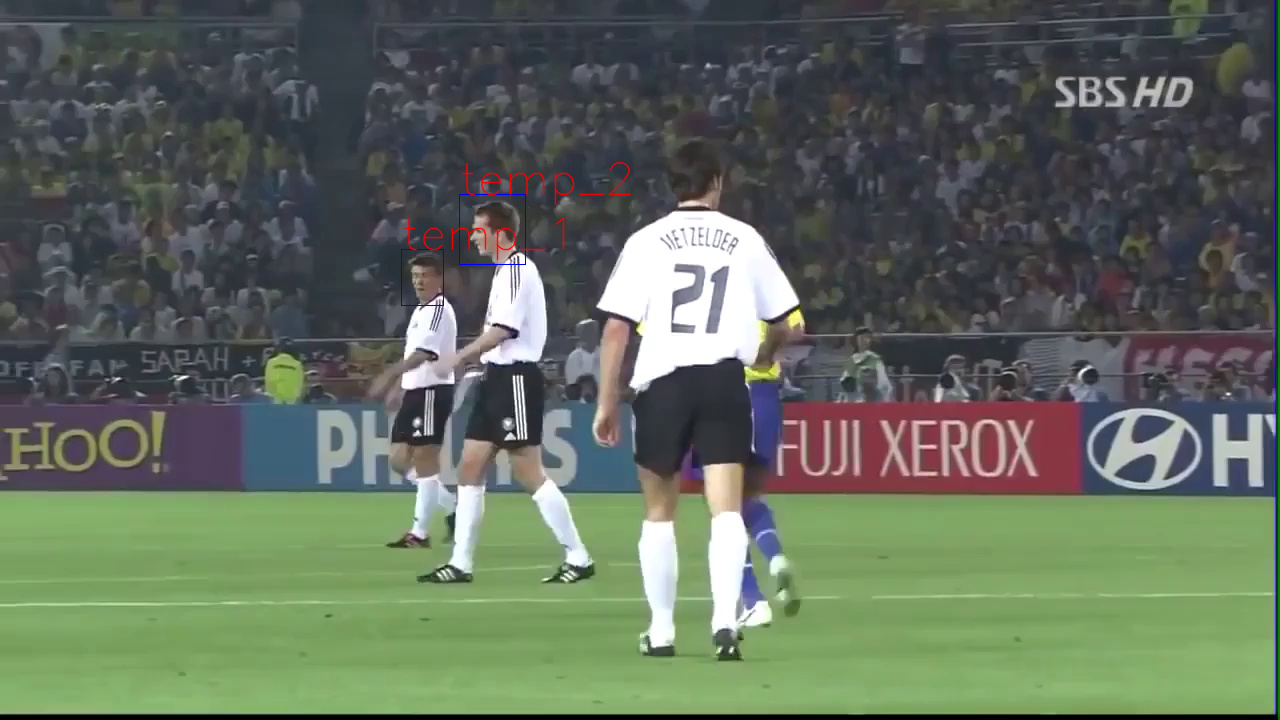

In [22]:

template_folder ="/MTM/MyDrive/template_matching/images/templates"
input_img="/MTM/MyDrive/template_matching/images/frame_0003.jpeg"
Multiple_Template_On_Image(template_folder, input_img)


In [5]:
listTemplate=[]
image_folder = "/MTM/MyDrive/template_matching/images/templates"
for filename in os.listdir(image_folder):
    template_img = cv2.imread(os.path.join(image_folder, filename))
    template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
    listTemplate.append((filename.split('.')[0], template_img))
listTemplate

[('temp_1',
  array([[ 50,  50,  50, ...,  52,  51,  50],
         [ 50,  50,  50, ...,  51,  51,  51],
         [ 50,  50,  50, ...,  51,  51,  51],
         ...,
         [ 81,  82,  81, ..., 157, 243, 104],
         [ 85,  86,  85, ..., 153, 251, 119],
         [ 88,  87,  90, ..., 150, 246, 125]], dtype=uint8)),
 ('temp_2',
  array([[ 58,  57,  57, ...,  54,  54,  55],
         [ 58,  58,  58, ...,  54,  54,  54],
         [ 59,  58,  58, ...,  53,  53,  54],
         ...,
         [ 53,  53,  54, ..., 252, 251, 252],
         [ 53,  53,  53, ..., 251, 254, 254],
         [ 53,  53,  54, ..., 250, 250, 254]], dtype=uint8))]

In [6]:



input_img="/MTM/MyDrive/template_matching/images/frame_0003.jpeg"
input_img=cv2.imread(input_img)
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

https://stackoverflow.com/questions/54442201/cv2-matchtemplate-gives-an-error-215assertion-failed

In [7]:
hits = matchTemplates(listTemplate,
                      input_img,
                      score_threshold=0.8,
                      searchBox=(0, 0, 3000, 750),
                      method=cv2.TM_CCOEFF_NORMED,
                      maxOverlap=0.1)


In [13]:
input_img="/MTM/MyDrive/template_matching/images/frame_0003.jpeg"
input_img=cv2.imread(input_img)
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
hits = matchTemplates(listTemplate,
                      input_img,
                      score_threshold=0.7,
                      searchBox=(0, 0, 3000, 750),
                      method=cv2.TM_CCOEFF_NORMED,
                      maxOverlap=0.1)
hits

,TemplateName,BBox,Score
1,temp_2,"(459, 194, 66, 70)",0.999996
0,temp_1,"(401, 249, 42, 56)",0.999994


In [17]:
type(hits)
len(hits["BBox"])

2

In [16]:
hits["BBox"][0]

(401, 249, 42, 56)

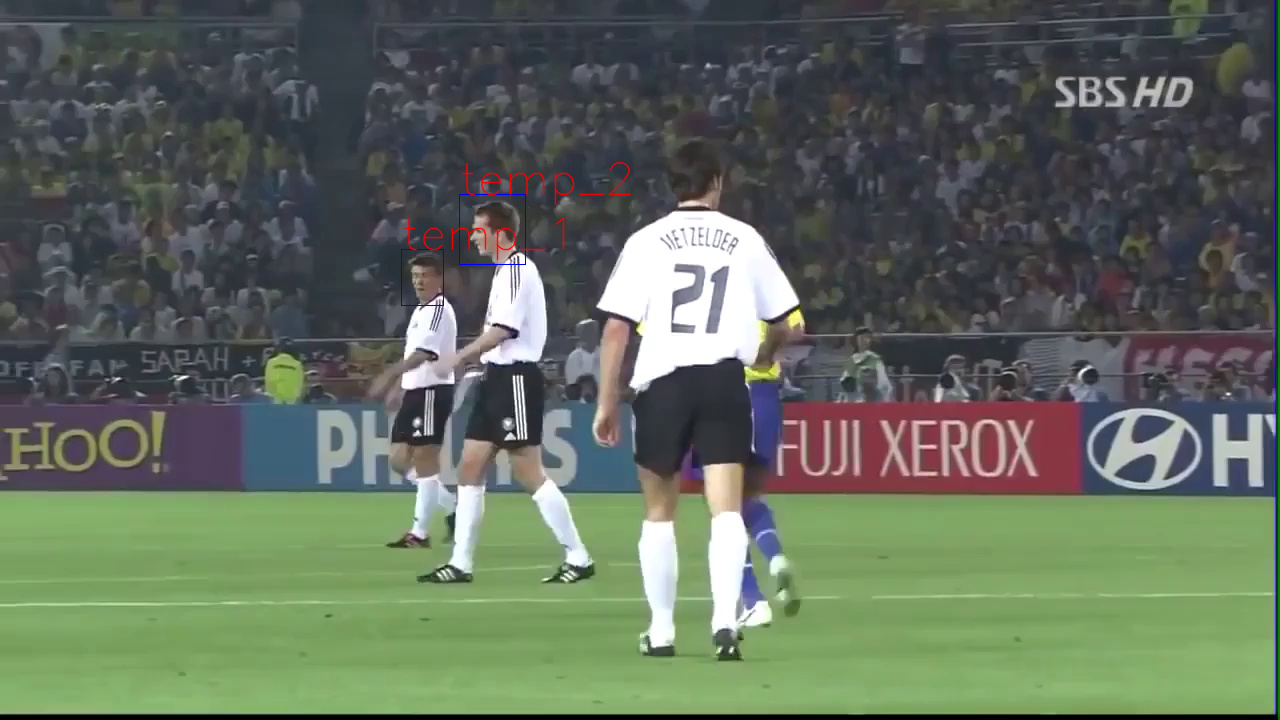

In [10]:
input_img="/MTM/MyDrive/template_matching/images/frame_0003.jpeg"
input_img=cv2.imread(input_img)
input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
hits = matchTemplates(listTemplate,
                      input_img,
                      score_threshold=0.7,
                      searchBox=(0, 0, 3000, 750),
                      method=cv2.TM_CCOEFF_NORMED,
                      maxOverlap=0.1)

input_img="/MTM/MyDrive/template_matching/images/frame_0003.jpeg"
input_img=cv2.imread(input_img)

import matplotlib.pyplot as plt
from MTM import drawBoxesOnRGB
overlay = drawBoxesOnRGB(input_img,
                         hits,
                         showLabel = True,
                         labelColor=( 0, 0,255),
                         boxColor = (255, 0, 0),
                         labelScale=1.5,
                         boxThickness = 1)

# plt.imshow(overlay)
# plt.show()
cv2_imshow(overlay)
cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
def is_point_inside_bbox(point, bbox):
    x, y = point
    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height

    if xmin <= x <= xmax and ymin <= y <= ymax:
        return True
    else:
        return False

# Example usage:
bbox = (10, 20, 30, 40)  # Replace with your actual bbox values
point_to_check = (150, 30)  # Replace with the point you want to check

if is_point_inside_bbox(point_to_check, bbox):
    print("Point is inside the bbox.")
else:
    print("Point is outside the bbox.")


Point is outside the bbox.
